In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')
from matplotlib import rcParams
rcParams['lines.linewidth'] = 0.7
rcParams['figure.figsize'] = 9, 6
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numba

<IPython.core.display.Javascript object>


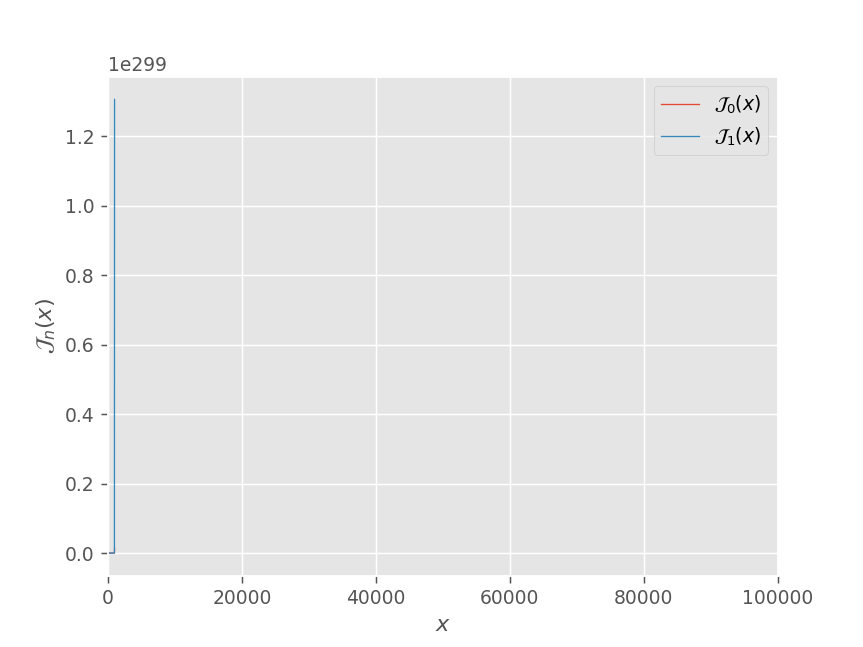

C:\Users\Taisiya\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [60]:
%matplotlib notebook
import numpy as np
import pylab as py
import scipy.special as sp

x = np.linspace(0, 100000, 5000)
x1 = x*np.exp(-1j*np.pi/4)

for v in range(0, 2):
    py.plot(x, sp.jv(v, x1));

py.xlim((0, 100000));
#py.ylim((-0.5, 1.1));
py.legend(('$\mathcal{J}_0(x)$', '$\mathcal{J}_1(x)$', '$\mathcal{J}_2(x)$',
           '$\mathcal{J}_3(x)$', '$\mathcal{J}_4(x)$', '$\mathcal{J}_5(x)$'),
           loc = 0);
py.xlabel('$x$')
py.ylabel('$\mathcal{J}_n(x)$')
#py.title('Plots of the first six Bessel Functions')                                
py.grid(True)
#py.savefig('besseln0to6.eps', format = 'eps')                                      
py.show();


In [207]:
f = np.linspace(1,30000, num=5000) #frequency Hz
omega = 2*np.pi*f # angular frequncy
a = 0.0012# pore size parameter
a2 = a*a
nu = 0.001 # fluid viscosity Pa.s
alpha = 1.671 # tortuosity factor
K = 10e-11 #hydraulic conductivity m2  (1darcy=10e-12)
Gsk = 0.1e9

rho_f = 1000.# fluid density kg/m3
rho_g = 2644 # grain density kg/m3
n = 0.4  # porosity
rho_mix= (1-n)*rho_g + n*rho_f

dseta = np.sqrt(omega*a2*rho_f/nu)

ar = dseta*np.exp(-1j*np.pi/4)
#T = np.exp(3j*np.pi/4)*sp.jv(1,ar)/sp.jv(0,ar)

In [208]:
np.exp(3j*np.pi/4)
J1=sp.jv(1,ar)
J0=sp.jv(0,ar)
Jdiv=J1/J0
T = np.exp(3j*np.pi/4)*Jdiv
preF = dseta*T/4 #/(1+2j*T/dseta)
denom=(1+2j*T/dseta)
F=preF/denom

(-0.70710678118654746+0.70710678118654757j)

<IPython.core.display.Javascript object>


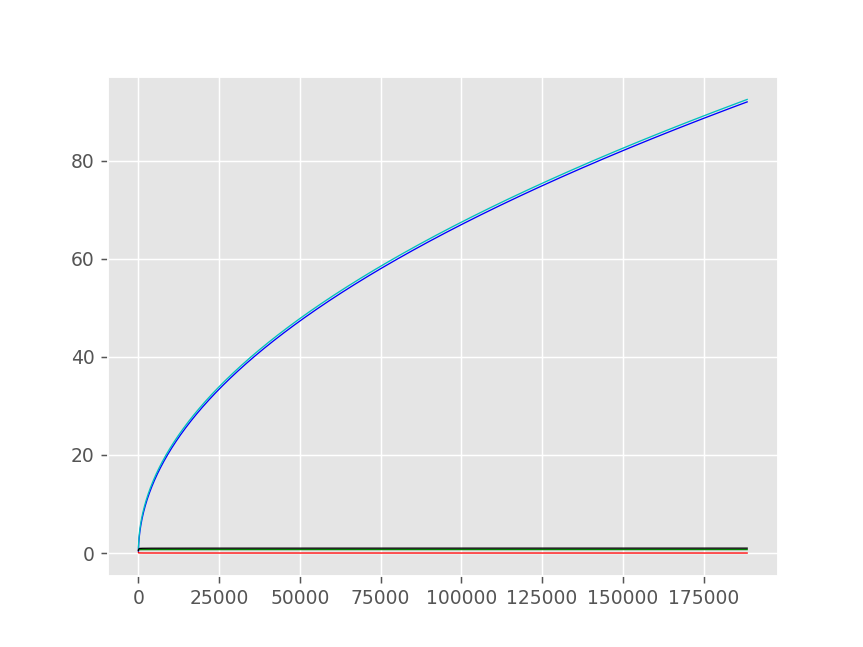

C:\Users\Taisiya\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [209]:
%matplotlib notebook
fig1 = plt.figure()
ax= fig1.add_subplot(111)
#ax.plot(omega, J1, 'b');
ax.plot(omega, Jdiv, 'r');
ax.plot(omega, T.real, 'g');
ax.plot(omega, preF, 'b');
ax.plot(omega, denom, 'k');
ax.plot(omega, F, 'c');
plt.show();

In [210]:
slag2=1j*nu*F/omega/K
q = alpha*rho_f/n - slag2
Vs2 = -Gsk*q/(rho_f*rho_f-rho_mix*q)
F[-1]
omega[-1]
F[-1]/omega[-1]
slag2[-1]
q[-1]
Vs2[-1]
Vs2[0]

(92.475039915057721+92.098765785736489j)

188495.55921538759

(0.00049059532383672537+0.00048859912758208958j)

(-4885.9912758208957+4905.953238367254j)

(9063.4912758208957-4905.953238367254j)

(52570.960252026605+1277.2756542194236j)

(50346.865942292614+13.421351942170736j)

<IPython.core.display.Javascript object>


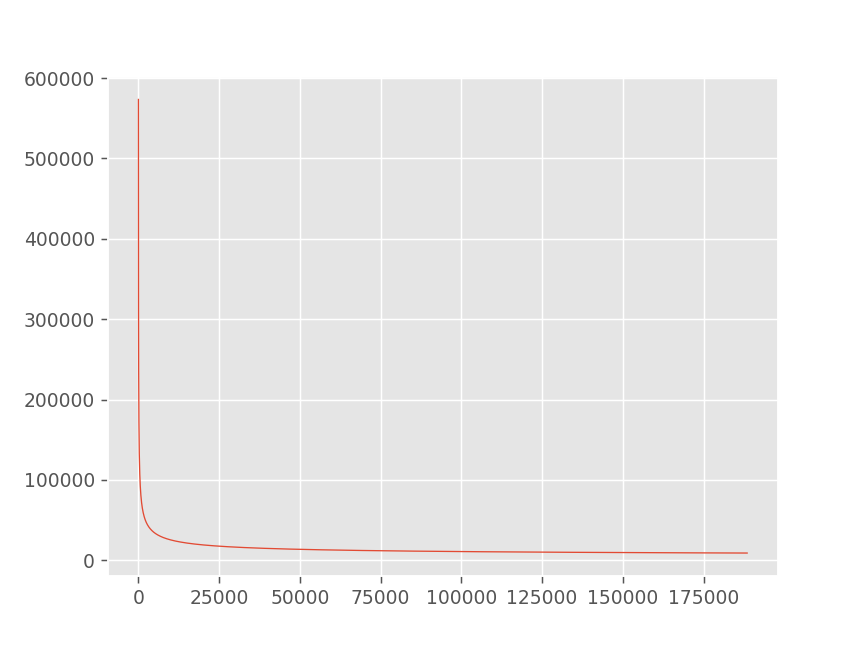

In [211]:
%matplotlib notebook
fig2= plt.figure()
ax= fig2.add_subplot(111)
#ax.plot(F)
#ax.plot(slag2)
ax.plot(omega, q.real)
plt.show();

In [212]:
Vs=np.sqrt(Vs2)
Vs[0]
Vs[-1]

(224.38107504143682+0.029907495406402241j)

(229.30049574790743+2.7851567656959149j)

<IPython.core.display.Javascript object>


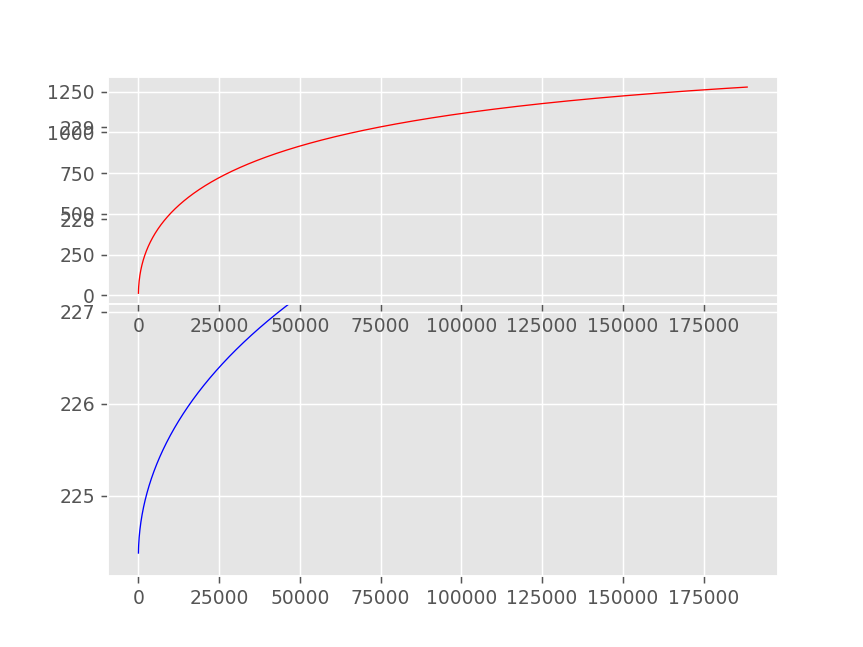

In [216]:
%matplotlib notebook
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)#, aspect = 'equal')
ax3.plot(omega, Vs.real, 'b');
ax4 = fig3.add_subplot(211)
ax4.plot(omega, Vs2.imag, 'r');
plt.show();